Dataset loaded successfully!

First 5 rows of the dataset:
    age  workclass    fnlwgt     education      marital-status  \
0  25.0    Private  226802.0          11th       Never-married   
1  38.0    Private   89814.0       HS-grad  Married-civ-spouse   
2  28.0  Local-gov  336951.0    Assoc-acdm  Married-civ-spouse   
3  44.0    Private  160323.0  Some-college  Married-civ-spouse   
4  18.0     Others  103497.0  Some-college       Never-married   

          occupation relationship  capital-gain  capital-loss  hours-per-week  \
0  Machine-op-inspct    Own-child           0.0           0.0            40.0   
1    Farming-fishing      Husband           0.0           0.0            50.0   
2    Protective-serv      Husband           0.0           0.0            40.0   
3  Machine-op-inspct      Husband           0.0           0.0            40.0   
4             Others    Own-child           0.0           0.0            32.5   

  native-country income  
0  United-States  <=50K  
1  Un

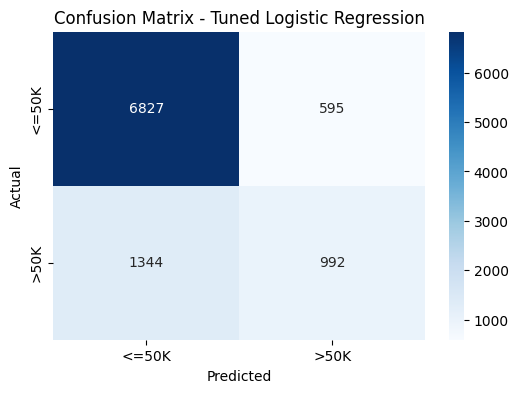


--- Training Random Forest with Hyperparameter Tuning ---
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best cross-validation F1-score for Random Forest: 0.6014

Metrics for Tuned Random Forest on Test Set:
  Accuracy: 0.8225
  Precision: 0.6456
  Recall: 0.5732
  F1-Score: 0.6073

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      7422
        >50K       0.65      0.57      0.61      2336

    accuracy                           0.82      9758
   macro avg       0.76      0.74      0.75      9758
weighted avg       0.82      0.82      0.82      9758


Confusion Matrix for Tuned Random Forest:


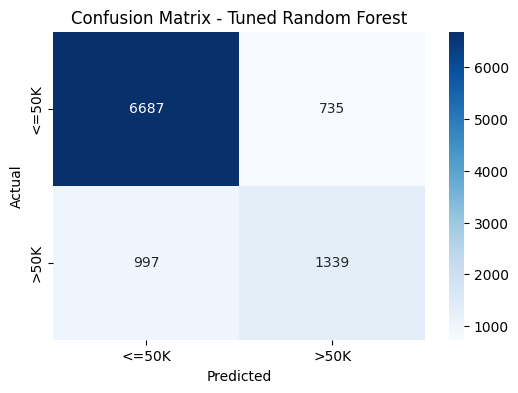


--- Training LightGBM with Hyperparameter Tuning ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Info] Number of positive: 9345, number of negative: 29687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 39032, number of used features: 89
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239419 -> initscore=-1.155868
[LightGBM] [Info] Start training from score -1.155868

Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
Best cross-validation F1-score for LightGBM: 0.6391

Metrics for Tuned LightGBM on Test Set:
  Accuracy: 0.8423
  Precision: 0.6999
  Recall: 0.5972
  F1-Score: 0.6445

Classification Report:
              precision    recall  f1-score  

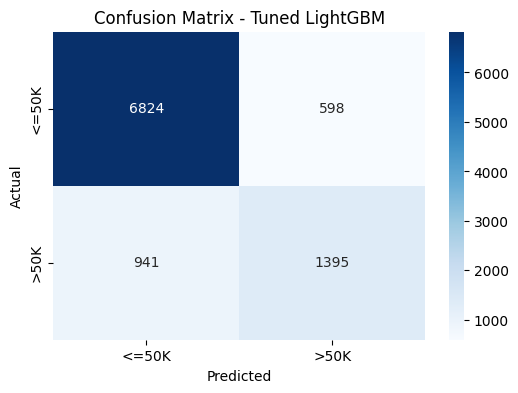


--- Training XGBoost with Hyperparameter Tuning ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best cross-validation F1-score for XGBoost: 0.6306

Metrics for Tuned XGBoost on Test Set:
  Accuracy: 0.8402
  Precision: 0.7072
  Recall: 0.5676
  F1-Score: 0.6298

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      7422
        >50K       0.71      0.57      0.63      2336

    accuracy                           0.84      9758
   macro avg       0.79      0.75      0.76      9758
weighted avg       0.83      0.84      0.83      9758


Confusion Matrix for Tuned XGBoost:


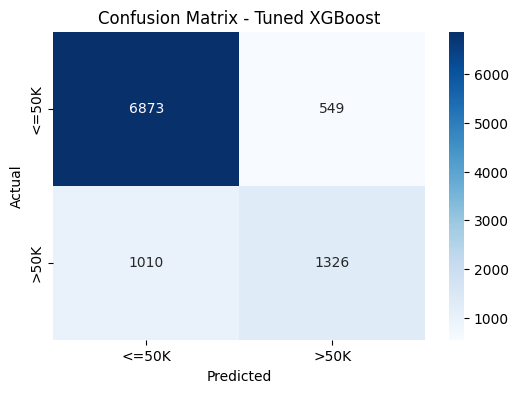


--- Summary of Best Cross-Validation F1-Scores ---
Logistic Regression: 0.5415
Random Forest: 0.6014
LightGBM: 0.6391
XGBoost: 0.6306
Preprocessor saved as 'preprocessor.joblib'
Best LightGBM model saved as 'lgbm_best_model.joblib'


In [ ]:
# %% [markdown]
# # Employee Salary Prediction using Machine Learning Algorithms - Improved Training

# %% [markdown]
# ## 1. Setup and Data Loading

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# %%
# Load the cleaned and optimized dataset
try:
    df = pd.read_csv('/content/optimized_employee_salary_data_modified.csv')
    print("Dataset loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    df.info()
except FileNotFoundError:
    print("Error: 'optimized_employee_salary_data.csv' not found. Please ensure the file is in the same directory.")
    exit()

# %% [markdown]
# ## 2. Data Preprocessing

# %%
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Encode the target variable (income)
le = LabelEncoder()
y = le.fit_transform(y)
print(f"\nEncoded income labels: {le.classes_} -> {np.unique(y)}")

# Identify categorical and numerical columns for preprocessing
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['float32', 'int64', 'float64']).columns

print(f"\nCategorical Features: {list(categorical_features)}")
print(f"Numerical Features: {list(numerical_features)}")

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply the preprocessor to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nProcessed Training set shape: {X_train_processed.shape}")
print(f"Processed Testing set shape: {X_test_processed.shape}")
print(f"Target variable balance in training set (0: <=50K, 1: >50K): {np.bincount(y_train)}")
print(f"Target variable balance in testing set (0: <=50K, 1: >50K): {np.bincount(y_test)}")

# %% [markdown]
# ## 3. Model Training and Hyperparameter Tuning

# %% [markdown]
# We will use `GridSearchCV` to find the best hyperparameters for each model. This involves defining a parameter grid and searching through all possible combinations.

# %%
# Function to train and evaluate a model with GridSearchCV
def train_and_evaluate_model_with_tuning(model, param_grid, model_name, X_train, y_train, X_test, y_test):
    print(f"\n--- Training {model_name} with Hyperparameter Tuning ---")

    # Create GridSearchCV object
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=3,  # 3-fold cross-validation
        scoring='f1', # Optimize for F1-score, useful for imbalanced classes
        n_jobs=-1, # Use all available cores
        verbose=1
    )

    # Fit GridSearchCV to the processed training data
    grid_search.fit(X_train, y_train)

    print(f"\nBest parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation F1-score for {model_name}: {grid_search.best_score_:.4f}")

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Make predictions on the processed test set with the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the best model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nMetrics for Tuned {model_name} on Test Set:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    print(f"\nConfusion Matrix for Tuned {model_name}:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Tuned {model_name}')
    plt.show()

    return best_model, grid_search.best_score_

# Store best models and scores for comparison
best_models = {}
best_scores = {}

# %% [markdown]
# ### 3.1. Logistic Regression with GridSearchCV

# %%
# Define parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10], # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs']
}

logistic_best_model, logistic_best_score = train_and_evaluate_model_with_tuning(
    LogisticRegression(random_state=42),
    lr_param_grid,
    'Logistic Regression',
    X_train_processed, y_train, X_test_processed, y_test
)
best_models['Logistic Regression'] = logistic_best_model
best_scores['Logistic Regression'] = logistic_best_score

# %% [markdown]
# ### 3.2. Random Forest Classifier with GridSearchCV

# %%
# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100], # Fewer estimators for faster search
    'max_depth': [5, 10, None] # None means no limit
}

random_forest_best_model, random_forest_best_score = train_and_evaluate_model_with_tuning(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    'Random Forest',
    X_train_processed, y_train, X_test_processed, y_test
)
best_models['Random Forest'] = random_forest_best_model
best_scores['Random Forest'] = random_forest_best_score

# %% [markdown]
# ### 3.3. LightGBM Classifier with GridSearchCV

# %%
# Define parameter grid for LightGBM
lgbm_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [20, 31]
}

lgbm_best_model, lgbm_best_score = train_and_evaluate_model_with_tuning(
    lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, n_jobs=-1),
    lgbm_param_grid,
    'LightGBM',
    X_train_processed, y_train, X_test_processed, y_test
)
best_models['LightGBM'] = lgbm_best_model
best_scores['LightGBM'] = lgbm_best_score

# %% [markdown]
# ### 3.4. XGBoost Classifier with GridSearchCV

# %%
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

xgb_best_model, xgb_best_score = train_and_evaluate_model_with_tuning(
    xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42, n_jobs=-1),
    xgb_param_grid,
    'XGBoost',
    X_train_processed, y_train, X_test_processed, y_test
)
best_models['XGBoost'] = xgb_best_model
best_scores['XGBoost'] = xgb_best_score

# %% [markdown]
# ## 4. Summary of Tuned Model Performance

# %%
print("\n--- Summary of Best Cross-Validation F1-Scores ---")
for model_name, score in best_scores.items():
    print(f"{model_name}: {score:.4f}")

# %% [markdown]
# ## 5. Conclusion
# By applying hyperparameter tuning with `GridSearchCV`, we aimed to improve the performance of each model. The best parameters found for each model are printed, along with their F1-scores on the cross-validation sets and detailed metrics on the test set. You can now compare these improved results to the initial runs and identify the most robust and accurate model for employee salary prediction.

# Further improvements could involve:
# * Expanding the hyperparameter search space or using `RandomizedSearchCV` for efficiency.
# * More advanced feature engineering.
# * Ensemble methods (e.g., stacking the best models).
# * Bias analysis and mitigation.

# %% [markdown]
# ## 6. Save the Best Model and Preprocessor for Deployment

# %%
import joblib

# Ensure you have run the LightGBM training block to get lgbm_best_model and preprocessor
# If running this standalone, you'd need to re-create/load these.

# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Preprocessor saved as 'preprocessor.joblib'")

# Save the best LightGBM model
joblib.dump(lgbm_best_model, 'lgbm_best_model.joblib')
print("Best LightGBM model saved as 'lgbm_best_model.joblib'")